<a href="https://colab.research.google.com/github/atul219/Devanagri_Digits/blob/master/Devanagri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf


In [131]:
!git clone https://github.com/atul219/Devanagri_Digits.git

fatal: destination path 'Devanagri_Digits' already exists and is not an empty directory.


In [0]:
dir_folder =  os.listdir('/content/Devanagri_Digits/Dataset/Train_Full_Data')

In [0]:
data_list = []
data_label = []
index_label = 0
for folder in dir_folder:
    path = os.path.join("/content/Devanagri_Digits/Dataset/Train_Full_Data/" + folder)
    images = os.listdir(path)
    
    folder_array = np.zeros([len(images),1024])
    folder_label = np.zeros([len(images) ,1])
    index = 0
    
    for image in images:
        image_1 = plt.imread(os.path.join(path +'/' +image))
       # plt.imshow(image_1)
       # data[index] = image_1
        reshape_image_1 = image_1.reshape([1,1024])
        folder_array[index] = reshape_image_1
        folder_label[index] = index_label
        index = index + 1
    index_label = index_label + 1
    
    data_list.append(folder_array)
    data_label.append(folder_label)

In [0]:
# convert data and label into array and then into Dataframe
data_array = np.concatenate(data_list)
label_array = np.concatenate(data_label)
# rehape label array to (n,1)
label_array = label_array.reshape(len(data_array),1)
# convert datatype int
label_array = np.int32(label_array)
#convert label into once hot encoded
no_classes = 36
#label_array = label_array.reshape(-1)
label = np.eye(no_classes , no_classes)[label_array[:,0]]

In [0]:
# convert data_array into data frame
data = pd.DataFrame(data_array)

In [0]:
def Conv_Layer(previous_layer_out,current_layer_kernels):
    
    layer_biases = tf.constant(value=0.1,dtype=tf.float32,shape=[10])
    
    layer_conv = tf.nn.conv2d(previous_layer_out,current_layer_kernels,strides=[1,1,1,1],padding="SAME")
    
    final_layer_out = layer_conv + layer_biases
    
    return final_layer_out

In [0]:
# input batch is for images which we will pass through our network
inputbatch = tf.placeholder(dtype=tf.float32,shape=[None,1024])
# to do convolution we need to reshape the image
reshapedinputbatch = tf.reshape(tensor=inputbatch,shape=[-1,32,32,1])

# actual label placeholder
actuallabels = tf.placeholder(shape=[None,36],dtype=tf.float32)


In [0]:
# weights for 1st convolutional layer
# we have 10 filters of 5*5 and depth of each filter is 1
layer_kernels = tf.Variable(initial_value=tf.random_normal(shape=[5,5,1,10]),
                               dtype=tf.float32)

In [0]:
# convolutional layer output
# output image dimension will be 32*32*10
first_conv_layer_out = Conv_Layer(reshapedinputbatch,layer_kernels)

In [0]:
# second convolutional layer weights
# 10 filters of 5*5 and depth of each filter is 10
another_layer_kernels = tf.Variable(initial_value=tf.random_normal(shape=[5,5,10,10]),
                               dtype=tf.float32)

In [0]:
# second convolutional layer output
# output of image will be 32*32*10
second_conv_layer_out = Conv_Layer(first_conv_layer_out,another_layer_kernels)

In [0]:
# to reduce the size of image we apply max pool
# dimension will be reduced by 1/2
# filter size is 2*2 and stride is 1 
# output of image will be 16*16*10
maxpooledout = tf.nn.max_pool(value=second_conv_layer_out,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")

In [0]:
# to pass image through our fully connected layer we need to reshape the image stretch the image
maxpooldoutflattened = tf.reshape(tensor=maxpooledout,shape=[-1,16*16*10])

In [0]:
# weights for fully connected layer
denseweights = tf.Variable(initial_value=tf.random_normal(shape=[16*16*10,16*16*10]),dtype=tf.float32)
# output of 1st fully connected layer
fully_connected_1 = tf.sigmoid(tf.matmul(maxpooldoutflattened,denseweights))

In [0]:
# weights for ouput layer
last_dense_weights = tf.Variable(initial_value=tf.random_normal(shape=[16*16*10,36]),dtype=tf.float32)
# it will provide probabilities
posterior_probs = tf.sigmoid(tf.matmul(fully_connected_1,last_dense_weights))

In [0]:
# loss function
loss_fn = tf.reduce_mean(input_tensor=tf.nn.softmax_cross_entropy_with_logits(labels=actuallabels,
                                                                             logits=posterior_probs))

In [0]:
# optimizer
optimizer = tf.train.AdamOptimizer()

# we have to minimize our loss
gd_step = optimizer.minimize(loss_fn)

In [148]:
# we have to run the complete code but first we have to make S object of Session class
with tf.Session() as s:
    
    # set mini batch size 
    mini_batch_size = 500
    
    # no of times we want to perform forward and backward pass
    epochs = 5000
    
    iterations = []
    
    loss_fn_values = []
    
    # this will initiallize gloabl variables
    s.run(tf.global_variables_initializer())
    
    for i in range(0,epochs):
        
        random_indices = np.random.randint(0,len(data),size=500)
        
        image_batch = pd.DataFrame(data.iloc[random_indices])
        
        image_labels = np.array(label[random_indices])
        
        # we have feed dictionary of data and label
        dict2feed = {inputbatch:image_batch,actuallabels:image_labels}
        
        # to run the code
        s.run([gd_step],feed_dict=dict2feed)
        
        # to check loss 
        loss_fn_value = s.run([loss_fn],feed_dict=dict2feed)
        
        print("The value of loss function at iteration # {} is {}".format((i+1),loss_fn_value))
        
        iterations.append((i+1))
        
        loss_fn_values.append(loss_fn_value)

The value of loss function at iteration # 1 is [3.6368232]
The value of loss function at iteration # 2 is [3.6228316]
The value of loss function at iteration # 3 is [3.6582608]
The value of loss function at iteration # 4 is [3.6850443]
The value of loss function at iteration # 5 is [3.6409223]
The value of loss function at iteration # 6 is [3.6613803]
The value of loss function at iteration # 7 is [3.650404]
The value of loss function at iteration # 8 is [3.640879]
The value of loss function at iteration # 9 is [3.6633315]
The value of loss function at iteration # 10 is [3.669801]
The value of loss function at iteration # 11 is [3.6561227]
The value of loss function at iteration # 12 is [3.629768]
The value of loss function at iteration # 13 is [3.6786664]
The value of loss function at iteration # 14 is [3.654932]
The value of loss function at iteration # 15 is [3.6627934]
The value of loss function at iteration # 16 is [3.6737573]
The value of loss function at iteration # 17 is [3.603

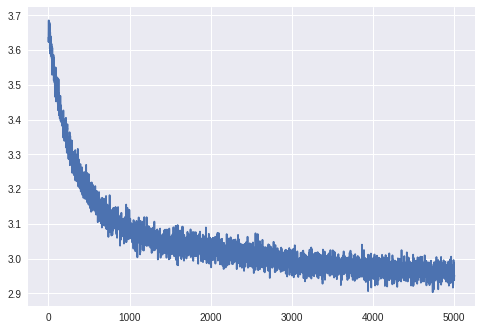

In [149]:
# plot the loss function graph
plt.plot(iterations,loss_fn_values)